KMeans Clustering

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Heart_Disease_Prediction.csv to Heart_Disease_Prediction.csv


In [ ]:
import pandas as pd

dataFrame = pd.read_csv('Heart_Disease_Prediction.csv')
dataFrame

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [ ]:
dataFrame = dataFrame.rename(columns={'Heart Disease': 'Heart_Disease'})

columns_to_drop = ['Sex', 'BP', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro']
dataFrame = dataFrame.drop(columns_to_drop, axis=1)

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import pandas as pd
import numpy as np

dataFrame.columns=['Age', 'Chest pain type', 'Cholesterol', 'Thallium', 'Heart_Disease']
dataFrame.dropna(how="all", inplace=True)
dataFrame

,Age,Chest pain type,Cholesterol,Thallium,Heart_Disease
0,70,4,322,3,Presence
1,67,3,564,7,Absence
2,57,2,261,7,Presence
3,64,4,263,7,Absence
4,74,2,269,3,Absence
...,...,...,...,...,...
265,52,3,199,7,Absence
266,44,2,263,7,Absence
267,56,2,294,3,Absence
268,57,4,192,6,Absence


In [ ]:
X = dataFrame.drop(['Heart_Disease'], axis=1)
X = X.values
y = dataFrame['Heart_Disease']
y = y.values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

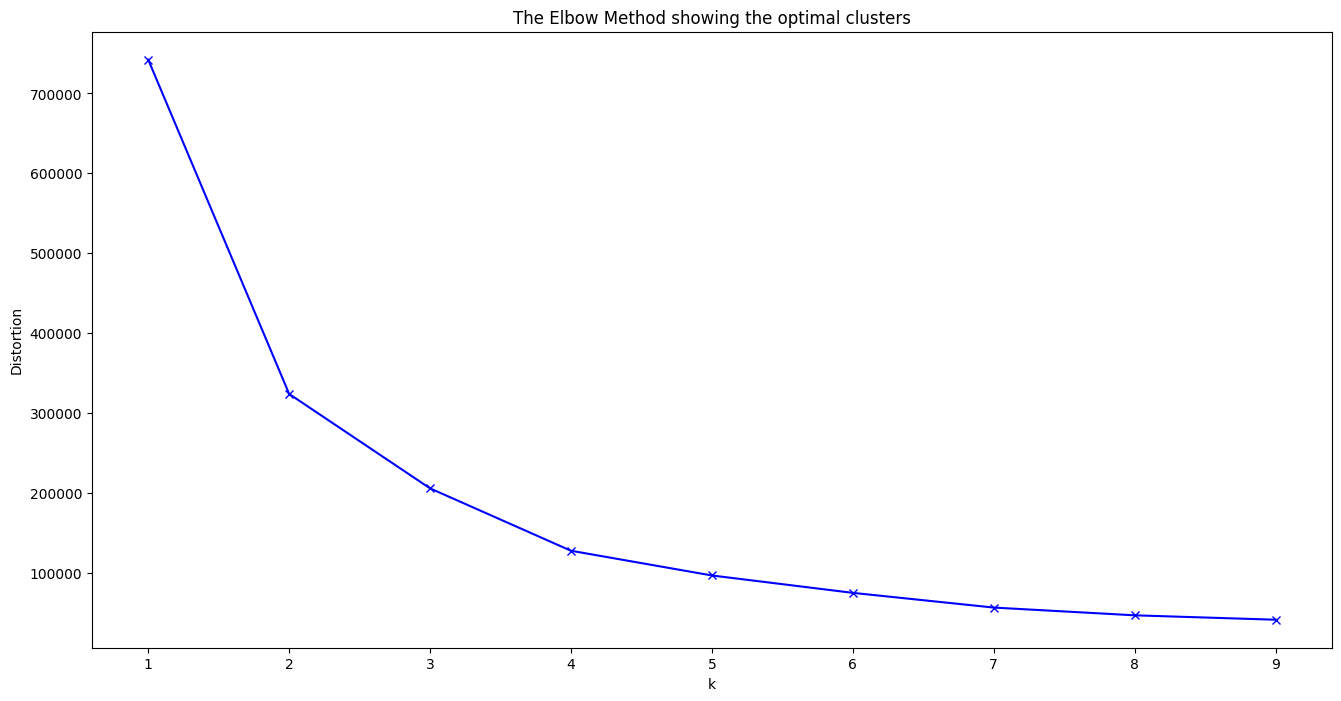

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

In [ ]:
kmeans_model = KMeans(n_clusters=3, random_state=32932)
kmeans_predict = kmeans_model.fit_predict(X)
kmeans_model.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 55.5511811 ,   3.14173228, 255.5984252 ,   4.84251969],
       [ 56.56862745,   3.37254902, 325.94117647,   4.54901961],
       [ 51.70652174,   3.10869565, 199.17391304,   4.57608696]])

In [ ]:
dataFrame['Cluster'] = kmeans_predict
dataFrame

,Age,Chest pain type,Cholesterol,Thallium,Heart_Disease,Cluster
0,70,4,322,3,Presence,1
1,67,3,564,7,Absence,1
2,57,2,261,7,Presence,0
3,64,4,263,7,Absence,0
4,74,2,269,3,Absence,0
...,...,...,...,...,...,...
265,52,3,199,7,Absence,2
266,44,2,263,7,Absence,0
267,56,2,294,3,Absence,1
268,57,4,192,6,Absence,2


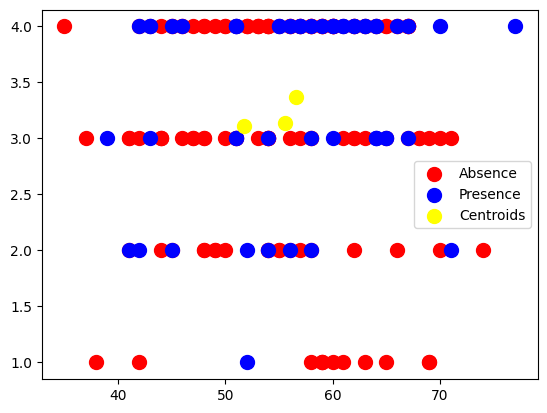

In [ ]:
plt.scatter(X[kmeans_predict == 0, 0], X[kmeans_predict == 0, 1], s = 100, c = 'red', label = 'Absence')
plt.scatter(X[kmeans_predict == 1, 0], X[kmeans_predict == 1, 1], s = 100, c = 'blue', label = 'Presence')

plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving SkyKilometers.csv to SkyKilometers.csv


In [ ]:
import pandas as pd

dataFrame2 = pd.read_csv('SkyKilometers.csv')
dataFrame2

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935
...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403
3995,64385,0,981,5,0,0,1395
3996,73597,0,25447,8,0,0,1402
3997,54899,0,500,1,500,1,1401


<ipython-input-12-d0deaed932d6>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataFrame2[features[i]], bins=20)


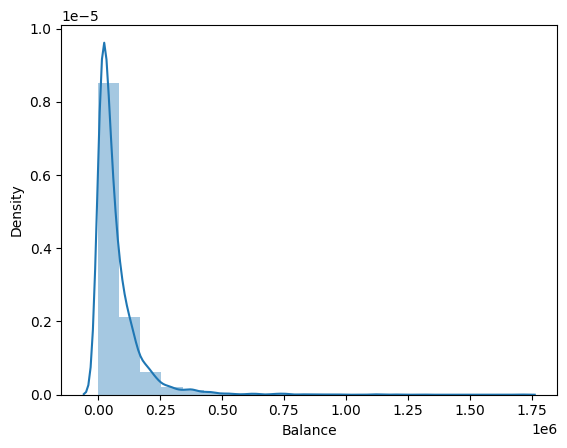

<ipython-input-12-d0deaed932d6>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataFrame2[features[i]], bins=20)


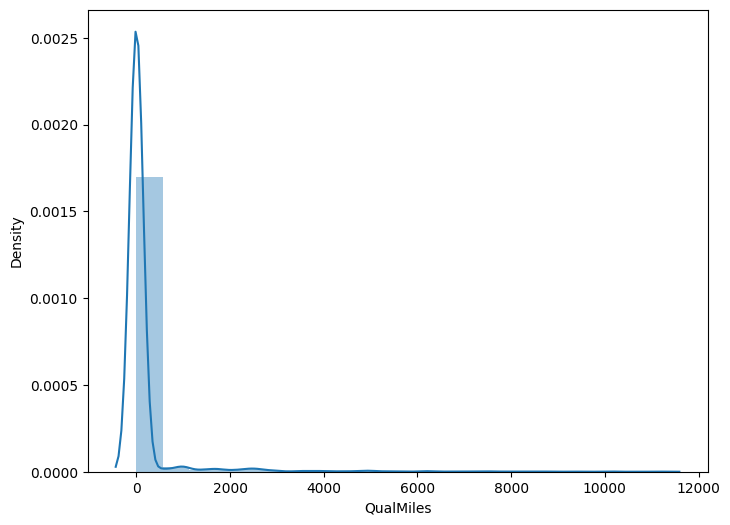

<ipython-input-12-d0deaed932d6>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataFrame2[features[i]], bins=20)


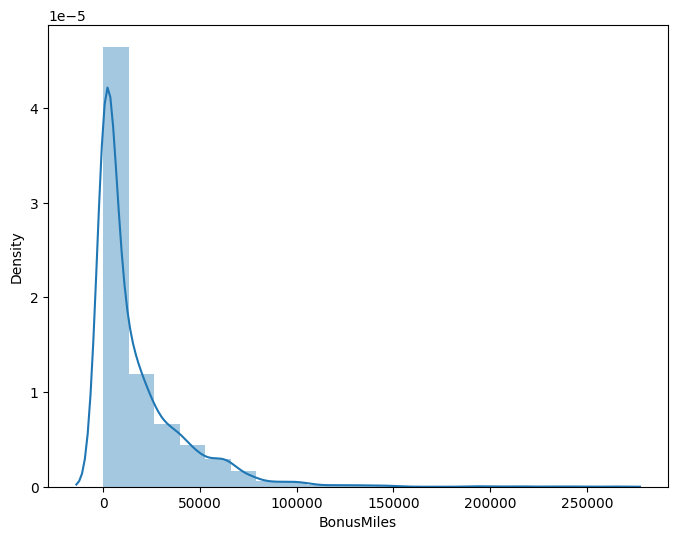

<ipython-input-12-d0deaed932d6>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataFrame2[features[i]], bins=20)


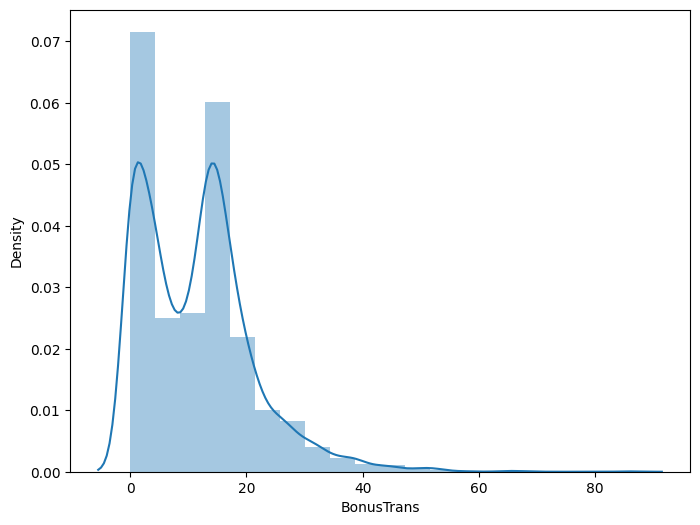

<ipython-input-12-d0deaed932d6>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataFrame2[features[i]], bins=20)


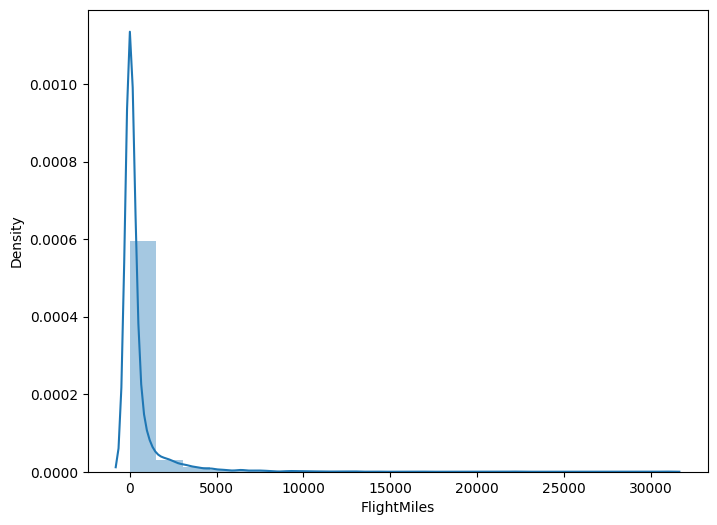

<ipython-input-12-d0deaed932d6>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataFrame2[features[i]], bins=20)


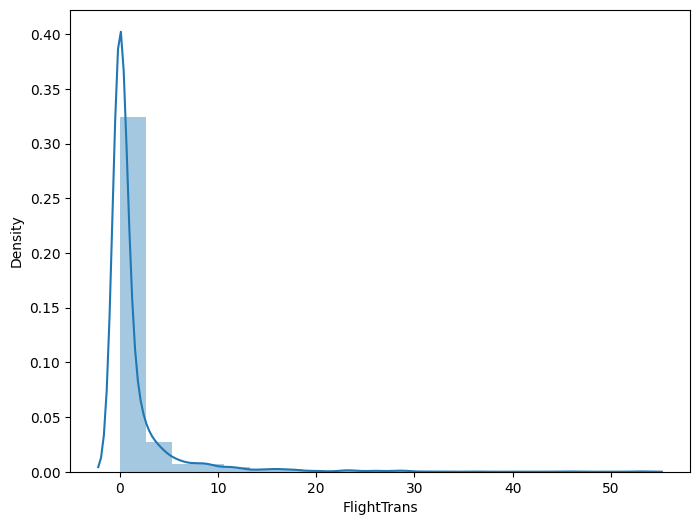

<ipython-input-12-d0deaed932d6>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataFrame2[features[i]], bins=20)


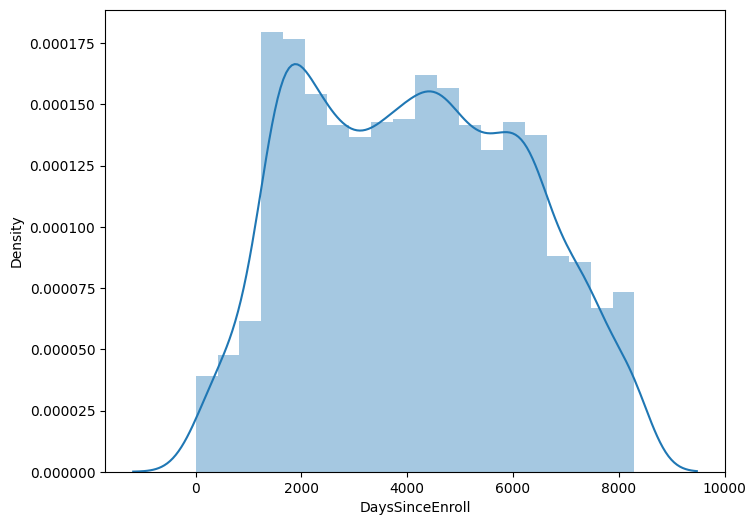

<Figure size 800x600 with 0 Axes>

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

features = dataFrame2.keys()
for i in range(0, 7):
    sns.distplot(dataFrame2[features[i]], bins=20)
    plt.show()
    plt.figure(figsize=(8, 6))

In [ ]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(dataFrame2[['Balance','QualMiles','BonusMiles','BonusTrans','FlightMiles','FlightTrans','DaysSinceEnroll']])
data_std = std_scale.transform(dataFrame2[['Balance','QualMiles','BonusMiles','BonusTrans','FlightMiles','FlightTrans','DaysSinceEnroll']])

In [ ]:
print('Mean after standardization:\nBalance={:.2f}, QualMiles={:.2f}, BonusMiles={:.2f}, BonusTrans={:.2f}, FlightMiles={:.2f}, FlightTrans={:.2f}, DaysSinceEnroll={:.2f}'
      .format(data_std[:,0].mean(), data_std[:,1].mean(), data_std[:,2].mean(), data_std[:,3].mean(), data_std[:,4].mean(), data_std[:,5].mean(), data_std[:,6].mean()))
print('\nStandard deviation after standardization:\nBalance={:.2f}, QualMiles={:.2f}, BonusMiles={:.2f}, BonusTrans={:.2f}, FlightMiles={:.2f}, FlightTrans={:.2f}, DaysSinceEnroll={:.2f}'
      .format(data_std[:,0].std(), data_std[:,1].std(), data_std[:,2].std(), data_std[:,3].std(), data_std[:,4].std(), data_std[:,5].std(), data_std[:,6].std()))

Mean after standardization:
Balance=0.00, QualMiles=0.00, BonusMiles=-0.00, BonusTrans=-0.00, FlightMiles=0.00, FlightTrans=0.00, DaysSinceEnroll=0.00

Standard deviation after standardization:
Balance=1.00, QualMiles=1.00, BonusMiles=1.00, BonusTrans=1.00, FlightMiles=1.00, FlightTrans=1.00, DaysSinceEnroll=1.00


In [ ]:
from scipy.spatial.distance import pdist, squareform

data_dist = pdist(data_std)
dist_matrix = linkage(data_dist,'ward', metric='euclidean')

<function matplotlib.pyplot.show(close=None, block=None)>

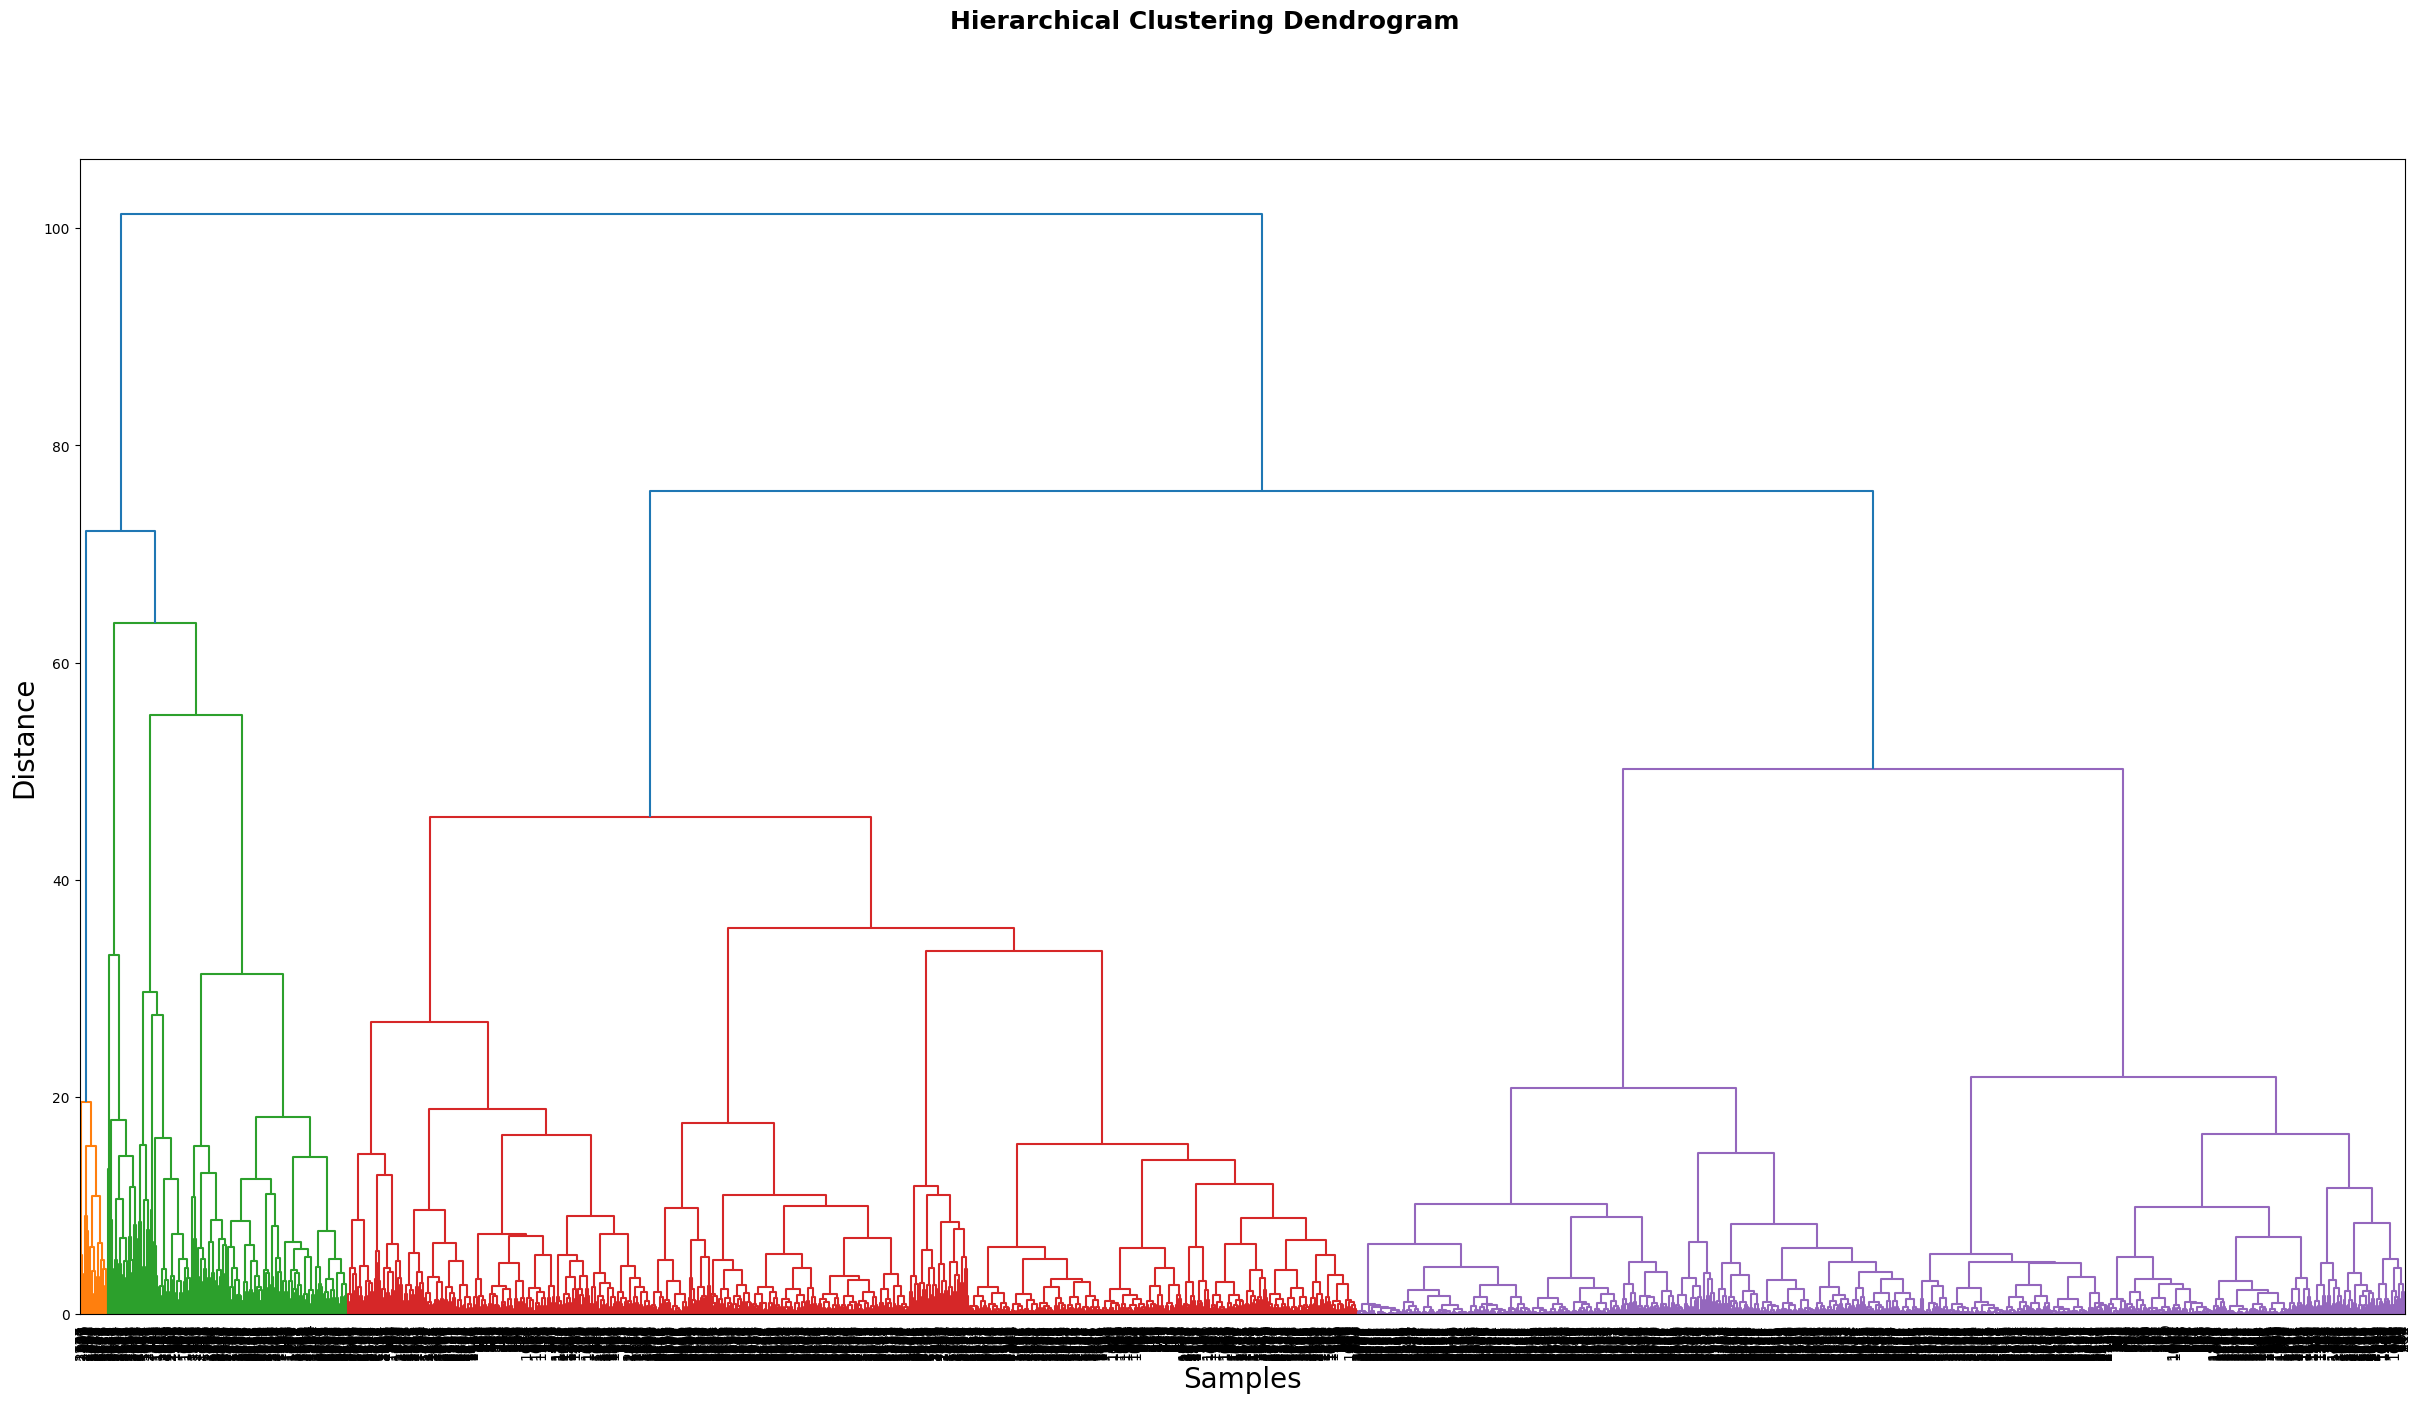

In [ ]:
plt.figure(figsize=(30, 15))
dendrogram(dist_matrix, leaf_rotation=90.,leaf_font_size=10.)
plt.xlabel('Samples', fontsize=20)
plt.ylabel('Distance', fontsize=20)
plt.suptitle('Hierarchical Clustering Dendrogram', fontweight='bold', fontsize=18);
plt.show

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
dataFrame2['cluster'] = cluster.fit_predict(data_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans

kmeans = KMeans(init='k-means++', n_clusters=5, n_init=20)
y_km = kmeans.fit(data_std)
y_pred = kmeans.fit_predict(data_std)

In [ ]:
clusters_labels = y_pred
clusters_centroid = kmeans.cluster_centers_
clusters_inertia = kmeans.inertia_

array([[<Axes: title={'center': 'Data samples in each cluster'}>]],
      dtype=object)

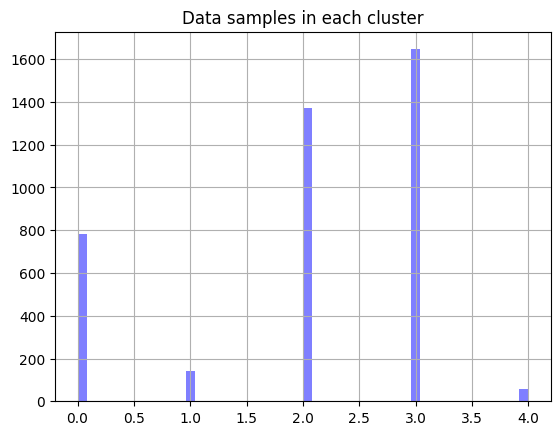

In [ ]:
df2=pd.DataFrame(data=clusters_labels,columns=['Data samples in each cluster'])
df2.hist(color='b', alpha=0.5, bins=50)

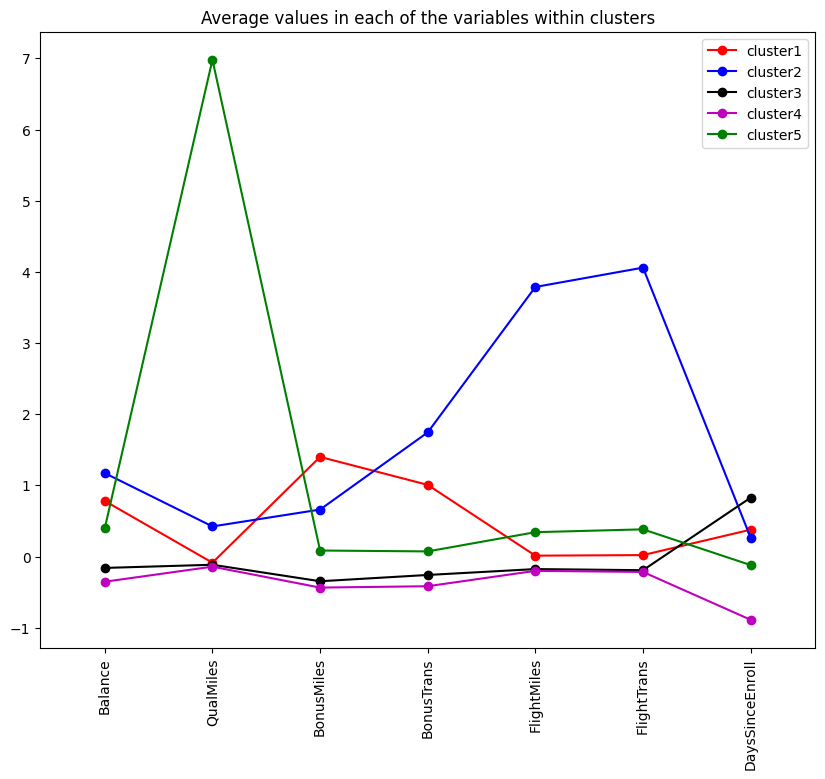

In [ ]:
labels=dataFrame2.columns.values
N=8
ind = np.arange(N)
plt.figure(figsize=(10, 8))
plt.plot((data_std[clusters_labels==0]).mean(axis=0),'-ro',label='cluster1')
plt.plot((data_std[clusters_labels==1]).mean(axis=0),'-bo',label='cluster2')
plt.plot((data_std[clusters_labels==2]).mean(axis=0),'-ko',label='cluster3')
plt.plot((data_std[clusters_labels==3]).mean(axis=0),'-mo',label='cluster4')
plt.plot((data_std[clusters_labels==4]).mean(axis=0),'-go',label='cluster5')
plt.xticks(ind,labels, rotation='vertical')
plt.margins(x=0.1)
plt.title('Average values in each of the variables within clusters')
plt.legend()
plt.show()

Principle Component Analysis

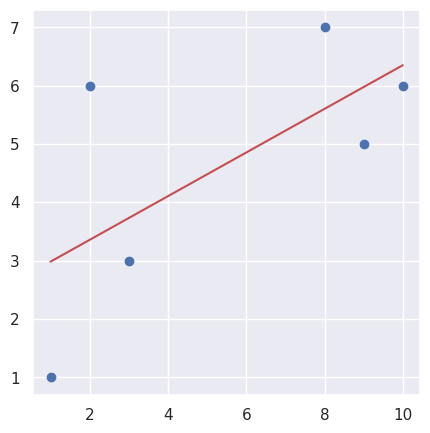

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

data = [[10, 6], [9, 5], [8, 7], [3, 3], [2, 6], [1, 1]]
df = pd.DataFrame(data, columns = ['Feature1', 'Feature2'])
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.scatter(df['Feature1'], df['Feature2'])
coeffs = np.polyfit(df['Feature1'], df['Feature2'], 1)
poly = np.poly1d(coeffs)
xs = df['Feature1']
ys = poly(xs)
ax.plot(xs, ys, 'r')
plt.show()

In [ ]:
df['Feature3'] = df['Feature1']-df['Feature1'].mean()
df['Feature4'] = df['Feature2']-df['Feature2'].mean()
df2 = df.drop(['Feature1', 'Feature2'], axis=1)
X = df2.to_numpy()
n = len(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [ ]:
print(pca.components_)
print(pca.explained_variance_)

[[-0.91343544 -0.40698365]
 [-0.40698365  0.91343544]]
[18.08420579  2.48246088]


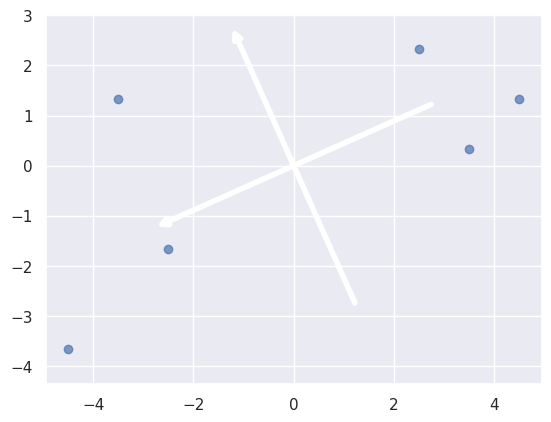

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=4,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3
    draw_vector(pca.mean_ - v, pca.mean_ + v)
plt.axis('equal');

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=5,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

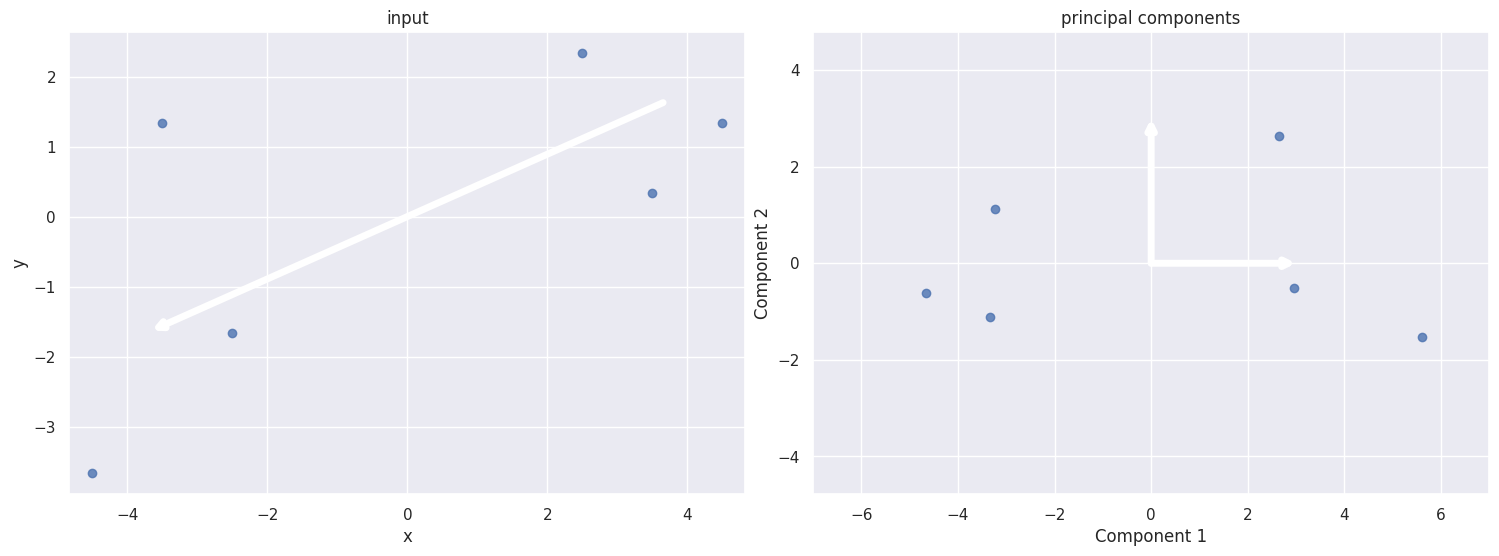

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.8)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 4
    draw_vector(pca.mean_ - v, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)
draw_vector([0, 0], [3, 0], ax=ax[1])
draw_vector([0, 0], [0, 3], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='Component 1', ylabel='Component 2',
          title='principal components',
          xlim=(-7, 7), ylim=(-5, 5))

fig.show()

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
import seaborn
import statsmodels.api as sm
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

df2 = pd.concat([df['Cholesterol'], df['Age']], axis=1)

df2_scaled = preprocessing.scale(df.iloc[:,range(1,5)])
df2_pca = df.iloc[:,range(1,5)]

pca = PCA()
pca.fit(df2_pca)

np.cumsum(pca.explained_variance_ratio_)

array([0.89659586, 0.99963158, 0.99993002, 1.        ])

In [ ]:
pca = PCA(n_components=1)
pca.fit(df2)
df2_pca = pca.transform(df2)
print("original shape:   ", df2.shape)
print("transformed shape:", df2_pca.shape)

original shape:    (270, 2)
transformed shape: (270, 1)


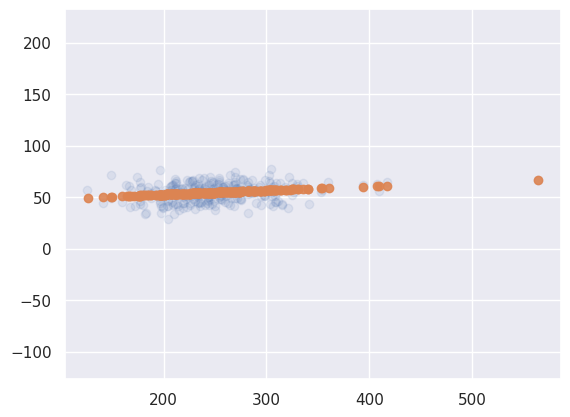

In [ ]:
df2_new = pca.inverse_transform(df2_pca)
plt.scatter(df2.iloc[:, 0], df2.iloc[:, 1], alpha=0.1)
plt.scatter(df2_new[:, 0], df2_new[:, 1], alpha=0.9)
plt.axis('equal');

In [ ]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']


In [ ]:
X = df.drop(['class'], axis=1)
X = X.values
y = df['class']
y = y.values

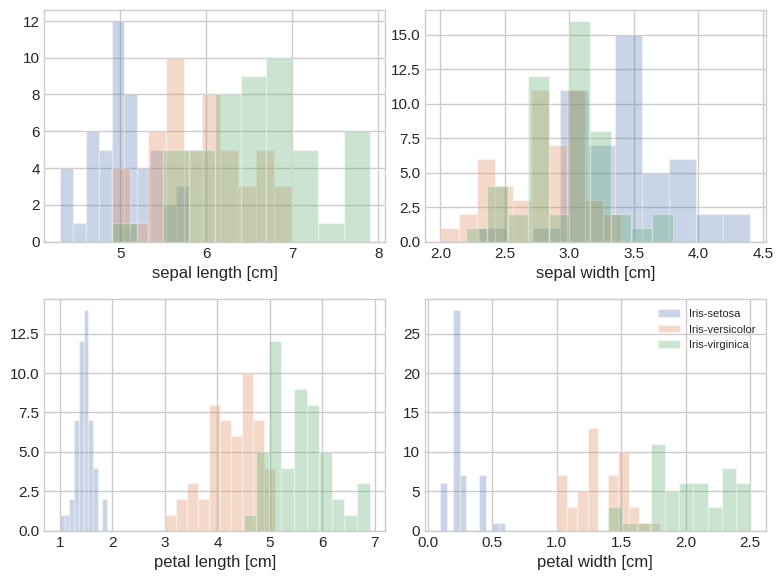

In [ ]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import math

label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

UV-Scaling


In [ ]:
X_new = (X - np.mean(X))/np.std(X, ddof=0)

X_sd = StandardScaler().fit_transform(X)

In [ ]:
# Covariance Matrix

x_bar = np.mean(X_sd, axis=0)
cov_matrix = (X_sd - x_bar).T.dot((X_sd - x_bar)) / (X_sd.shape[0]-1)
print(cov_matrix)

[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [ ]:
# Calculating Eigenvectors & Eigenvalues

cov_matrix = np.cov(X_sd.T)
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

print(eig_vectors)
print(eig_values)

[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
[2.93035378 0.92740362 0.14834223 0.02074601]


In [ ]:
# Calculating the explained varience

tot = sum(eig_values)
var_exp = [(i / tot)*100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])